# Plot infer results

In [1]:
%matplotlib ipympl
%load_ext autoreload
%autoreload 2

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from utils import mesh, interpolate, subset_variable, update_anim, simple_mesh_plot

### Open the (netcdf) dataset using xarray

In [4]:
dir = '/lustre/storeB/project/fou/hi/foccus/experiments/graph_resolution/'
#dir = '/lustre/storeB/project/fou/hi/foccus/experiments/temp-jan/'
#file = dir + '62677636-infer.nc'
#file = dir + '62677636-infer.nc'
file = dir + '5/infer-test-5res.nc'
ds = xr.open_dataset(file)

Select the variable and number of time steps

In [9]:
ntime = 2
var_name = 'temperature_1'
var_norway = ds[var_name]

longitude = ds.longitude
latitude = ds.latitude

In [10]:
var_norway.shape

(2, 1822664)

### Get a subset of the dataset 
Default: Lofoten & Vesterålen, Northern Norway

In [11]:
lon_min, lon_max = 11.83083, 15.59072
lat_min, lat_max = 67.41791, 69.20699

var, lat, lon = subset_variable(var_norway,latitude,longitude,lat_min,lat_max,lon_min,lon_max)
#del var_norway, longitude, latitude

# if want to plot all of Norway
#var = var_norway
#lat = latitude
#lon = longitude

In [21]:
from utils import plot_landmask

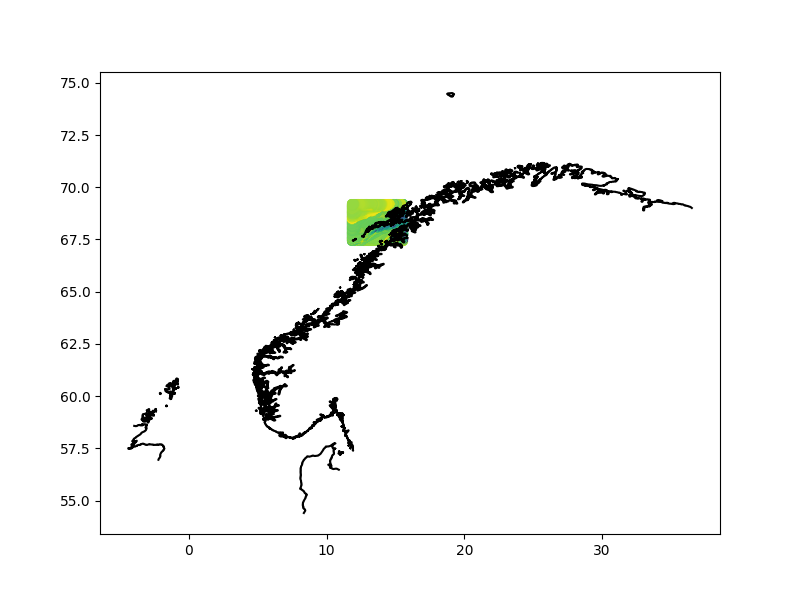

In [22]:
fig0, ax0 = plt.subplots(figsize=(8, 6))
ax0.scatter(lon,lat,c=var[0])
plot_landmask(ax0)


The inference results are given as 1D arrays in the .nc-file. We use meshgrid and an interpolation to map the data back to 2D arrays. 

Note: Resolution of the grid needs to be set. If it is too small the plotting/animation will be very slow. But you want to see small features too. Find a middle ground.

In [23]:
resolution=0.05 # TODO try smaller than 0.25, this is same as MEPS I think?
lat_grid, lon_grid = mesh(lat, lon, resolution)
# TODO: no need to call mesh here an also inside interpolate...

var_interp = np.empty([ntime,lat_grid.shape[0],lat_grid.shape[1]])
for itime in range(ntime):
    var_interp[itime] = interpolate(var[itime], lat, lon, resolution)

NOTE: the interpolate function used below somehow gets values over land...

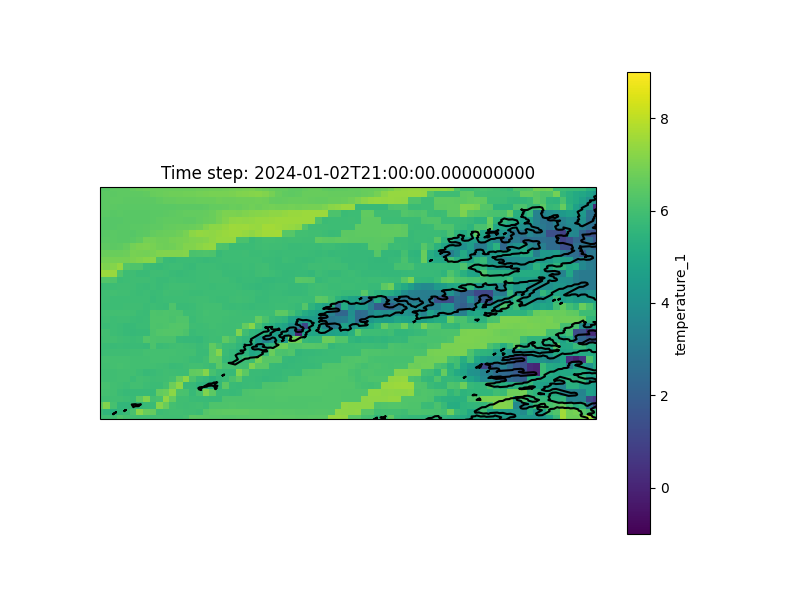

In [24]:
time_steps = ds.time.values
vmin = int(var_interp.min() - 0.5)
vmax = int(var_interp.max() + 0.5)
# Initialize the plot at t=0
fig, ax1, heatmap = simple_mesh_plot(var_interp[0],lat_grid,lon_grid,time_steps[0],
                                     var_name,vmin,vmax)

# Start the animation:
# set interval=500 for a slower anim, 200 or 100 for faster
ani = animation.FuncAnimation(fig, update_anim, frames=ntime, interval=100,fargs=(ax1, heatmap, var_interp, time_steps))

Save the animation as a GIF (optional)

**NOTE:** only possible if the imagemagick package is installed already

In [ ]:
#ani.save('zarr_animation.gif', writer='imagemagick')

## Investigating the dataset

# Do we have values over land? Or is the interpolation method failing?

In [14]:
#var_norway = ds[var_name]
#longitude = ds.longitude
#latitude = ds.latitude
var_norway

<xarray.DataArray 'temperature_1' (time: 2, values: 1822664)> Size: 15MB
[3645328 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 16B 2024-01-02T21:00:00 2024-01-02T22:00:00
Dimensions without coordinates: values

In [17]:
var_norway.values.min()

-3.1190336